In [1]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [15]:
h17 = pd.read_csv('2017.csv', on_bad_lines='skip')
h17.drop(['Whisker.high', 'Whisker.low'], axis=1, inplace=True)
h17 = h17.round(2)

region_df = pd.read_csv('2016.csv')
h17['Country'] = h17['Country'].str.strip()
region_df['Country'] = region_df['Country'].str.strip()
h17 = pd.merge(h17, region_df[['Country', 'Region']], on='Country', how='left')



h17.head()

Country  Happiness.Rank  Happiness.Score  Economy..GDP.per.Capita.  \
0       Norway               1             7.54                      1.62   
1      Denmark               2             7.52                      1.48   
2      Iceland               3             7.50                      1.48   
3  Switzerland               4             7.49                      1.56   
4      Finland               5             7.47                      1.44   

   Family  Health..Life.Expectancy.  Freedom  Generosity  \
0    1.53                      0.80     0.64        0.36   
1    1.55                      0.79     0.63        0.36   
2    1.61                      0.83     0.63        0.48   
3    1.52                      0.86     0.62        0.29   
4    1.54                      0.81     0.62        0.25   

   Trust..Government.Corruption.  Dystopia.Residual          Region  
0                           0.32               2.28  Western Europe  
1                           0.40               2.31  Western Europe  
2                           0.15               2.32  Western Europe  
3                           0.37               2.28  Western Europe  
4                           0.38               2.43  Western Europe

- Average of happiness score 

In [5]:
happiness = h17['Happiness.Score'].mean()
print(happiness)

5.353741935483871


1- The repeat size of each region

C:\Users\User\AppData\Local\Temp\ipykernel_32\124218491.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')


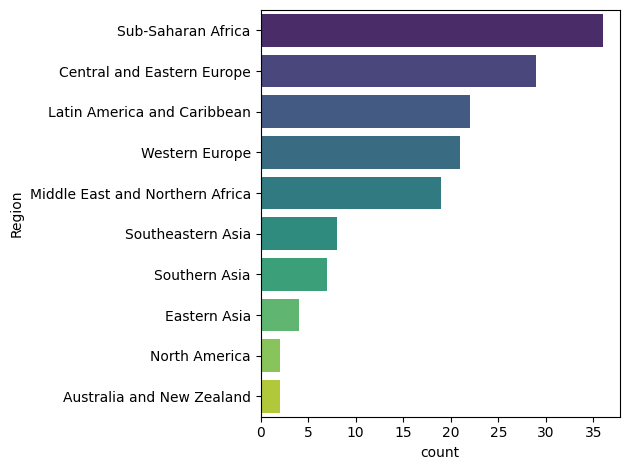

In [12]:
region = h17['Region'].value_counts().reset_index()
sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')
plt.tight_layout()
plt.show()

2- Top Regions with Happiness Score > 5.3 in 2016

C:\Users\User\AppData\Local\Temp\ipykernel_32\2708254822.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')


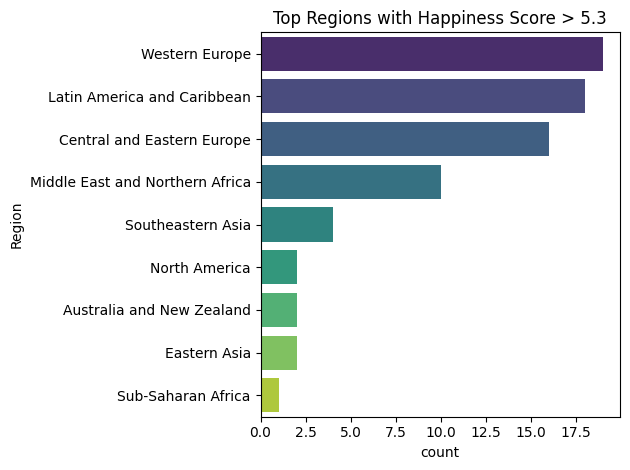

In [13]:
filtered = h17[h17['Happiness.Score'] > 5.3]
region = filtered['Region'].value_counts().reset_index()
region.columns = ['Region', 'count']
sns.barplot(x='count', y='Region', data=region.head(10), palette='viridis')
plt.title('Top Regions with Happiness Score > 5.3')
plt.tight_layout()
plt.show()

3- Top Regions with Happiness Score < 5.3 in 2016

C:\Users\User\AppData\Local\Temp\ipykernel_32\2348106929.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='count', y='Region', data=region.head(8), palette='viridis')


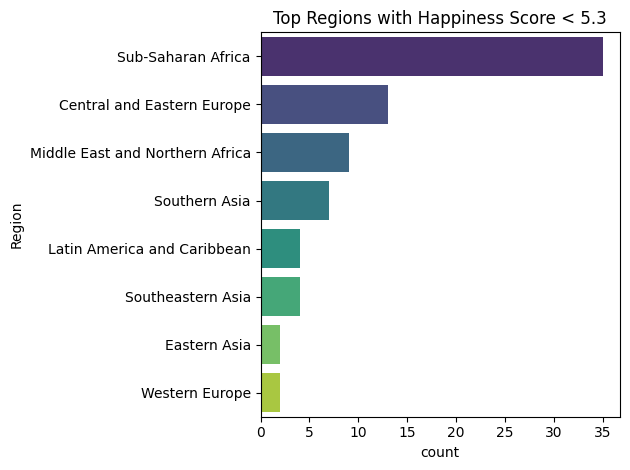

In [14]:
filtered = h17[h17['Happiness.Score'] < 5.3]
region = filtered['Region'].value_counts().reset_index()
region.columns = ['Region', 'count']
sns.barplot(x='count', y='Region', data=region.head(8), palette='viridis')
plt.title('Top Regions with Happiness Score < 5.3')
plt.tight_layout()
plt.show()

4- Comparison of average scores by category for all regions

C:\Users\User\AppData\Local\Temp\ipykernel_32\1644269861.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


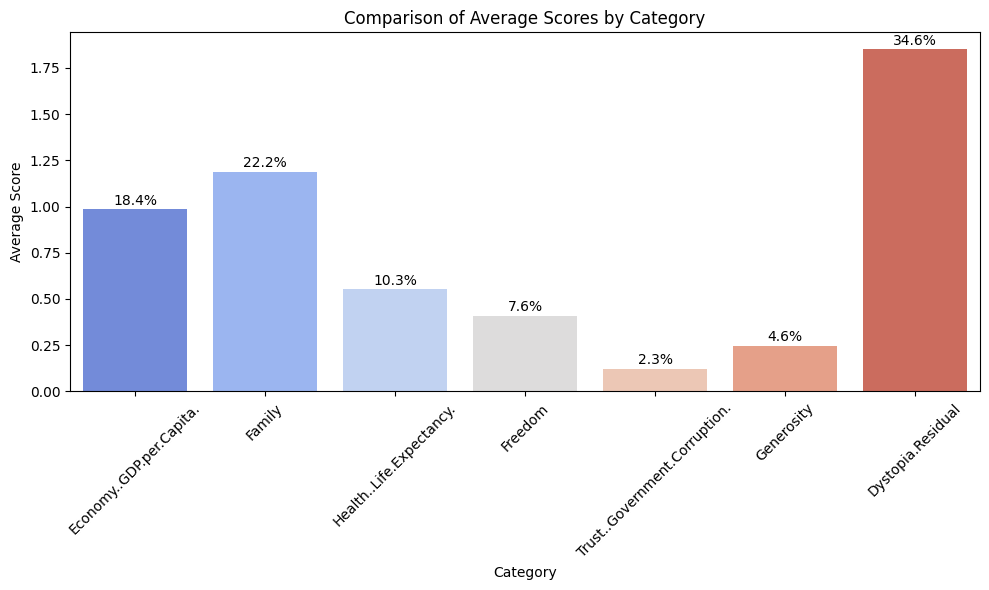

In [16]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
averages = h17[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Comparison of Average Scores by Category')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

5- Comparison of average scores by category for all regions with a happiness score greater than 5.3

C:\Users\User\AppData\Local\Temp\ipykernel_32\3842919219.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


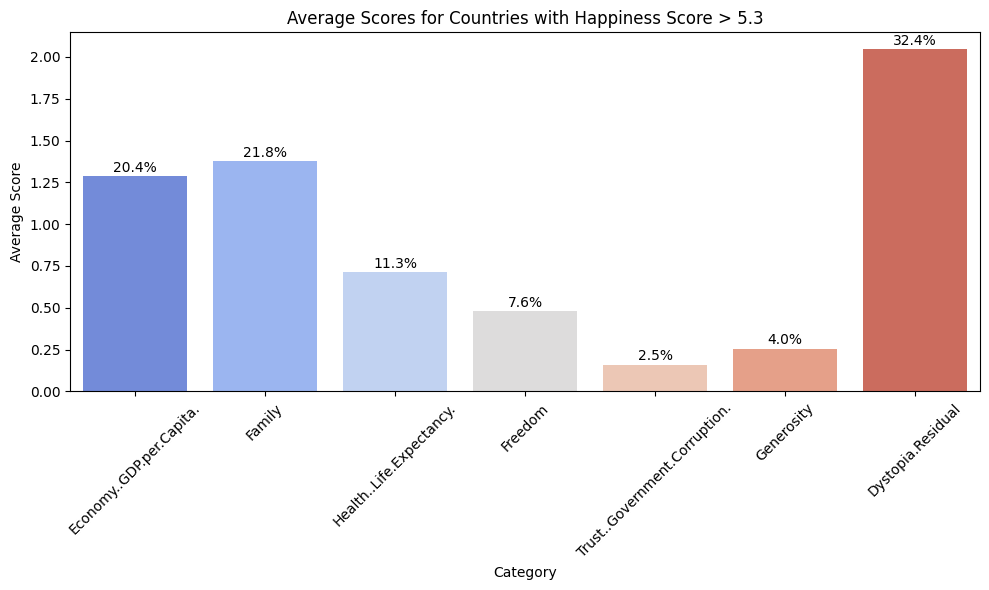

In [18]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
high_score = h17[h17['Happiness.Score'] > 5.3]
averages = high_score[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Scores for Countries with Happiness Score > 5.3')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

6- Comparison of average scores by category for all areas with a happiness score less than or equal to 5.3

C:\Users\User\AppData\Local\Temp\ipykernel_32\1204326127.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')


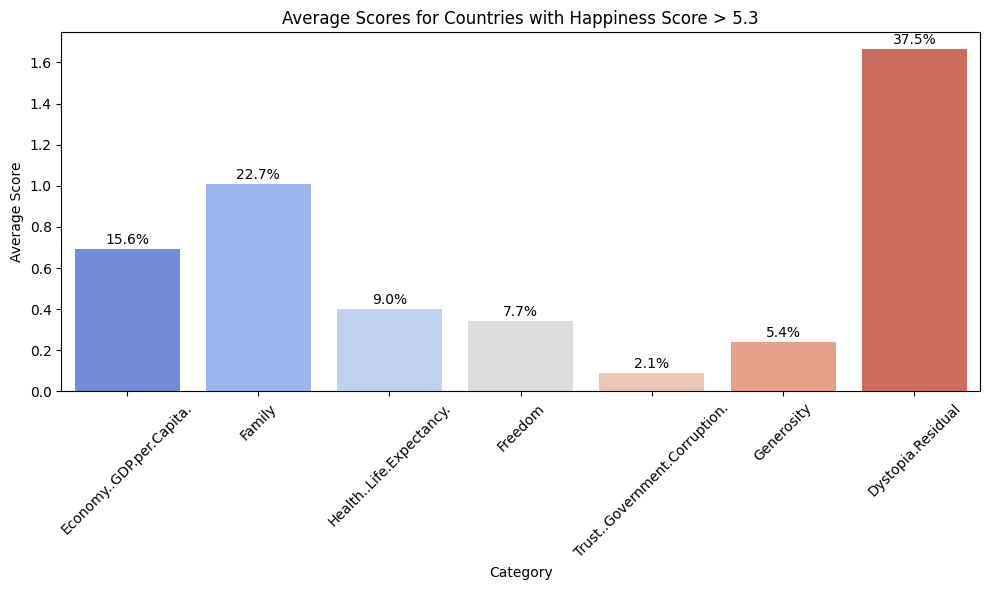

In [19]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
high_score = h17[h17['Happiness.Score'] <= 5.3]
averages = high_score[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
avg_df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=avg_df, x='Category', y='Average', palette='coolwarm')
for index, row in avg_df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Scores for Countries with Happiness Score > 5.3')
plt.ylabel('Average Score')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

7- Average Indicators for Latin America and Caribbean Region

C:\Users\User\AppData\Local\Temp\ipykernel_32\3889344573.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


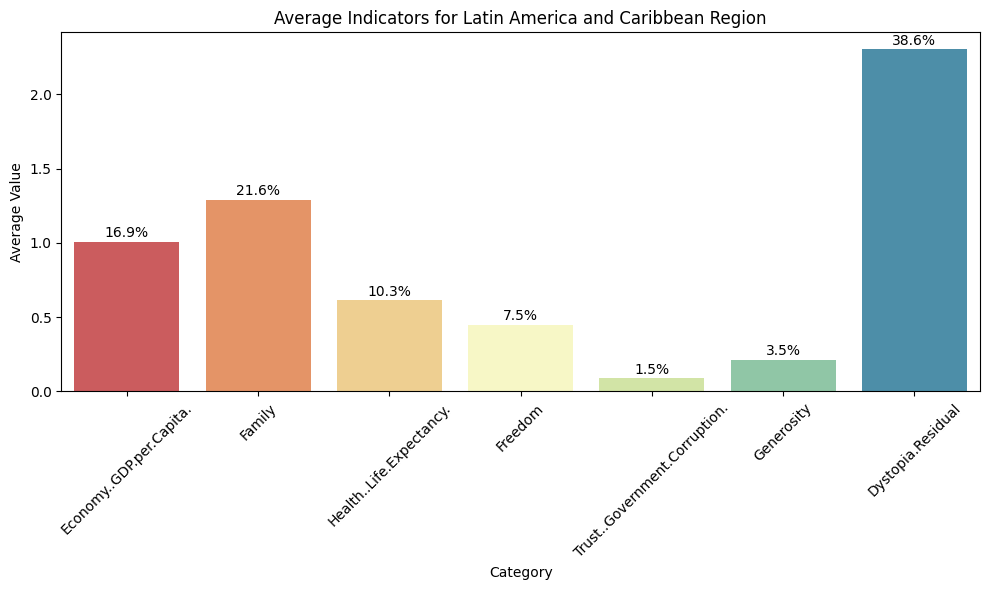

In [20]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'Latin America and Caribbean']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Latin America and Caribbean Region')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

8- Average Indicators for Western Europe

C:\Users\User\AppData\Local\Temp\ipykernel_32\4121449986.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


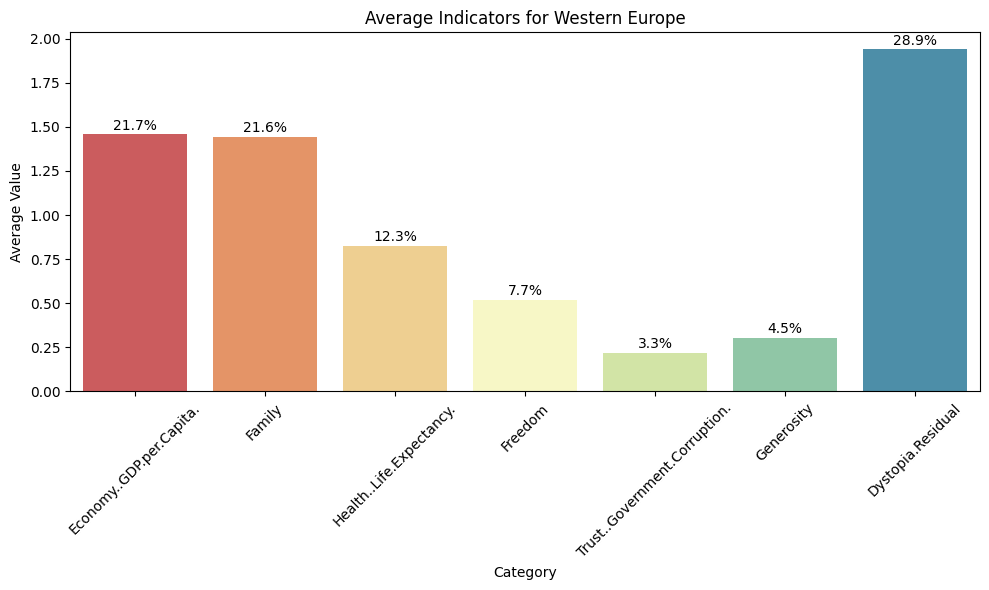

In [22]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'Western Europe']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Western Europe')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

9- Average Indicators for Eastern Europe

C:\Users\User\AppData\Local\Temp\ipykernel_32\2608089980.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


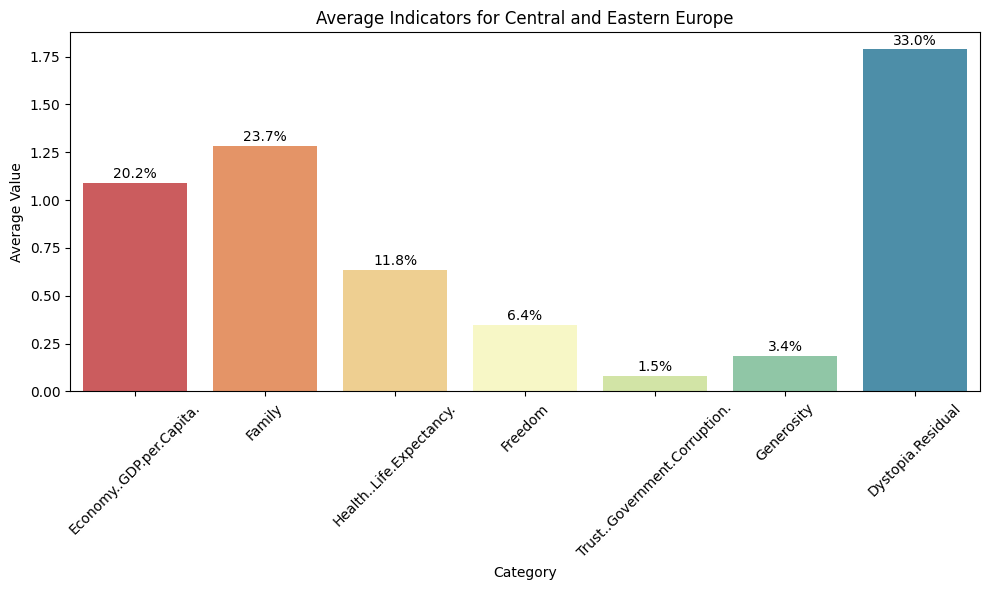

In [23]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'Central and Eastern Europe']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Central and Eastern Europe')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

10- Average Indicators for Middle East and Northern Africa

C:\Users\User\AppData\Local\Temp\ipykernel_32\3883951745.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


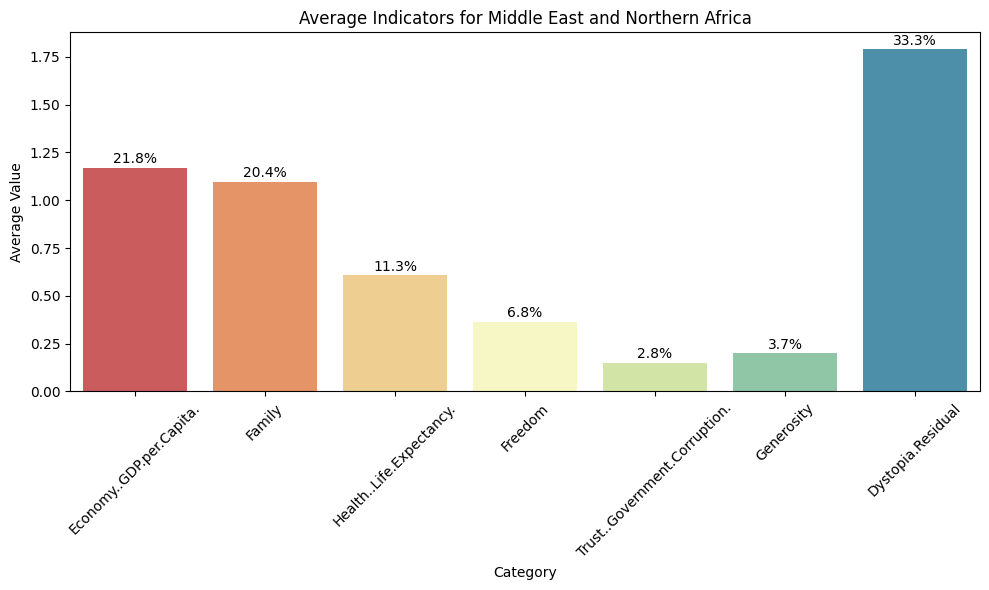

In [24]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'Middle East and Northern Africa']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Middle East and Northern Africa')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

11- Average Indicators for Southeastern Asia

C:\Users\User\AppData\Local\Temp\ipykernel_32\2633168776.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


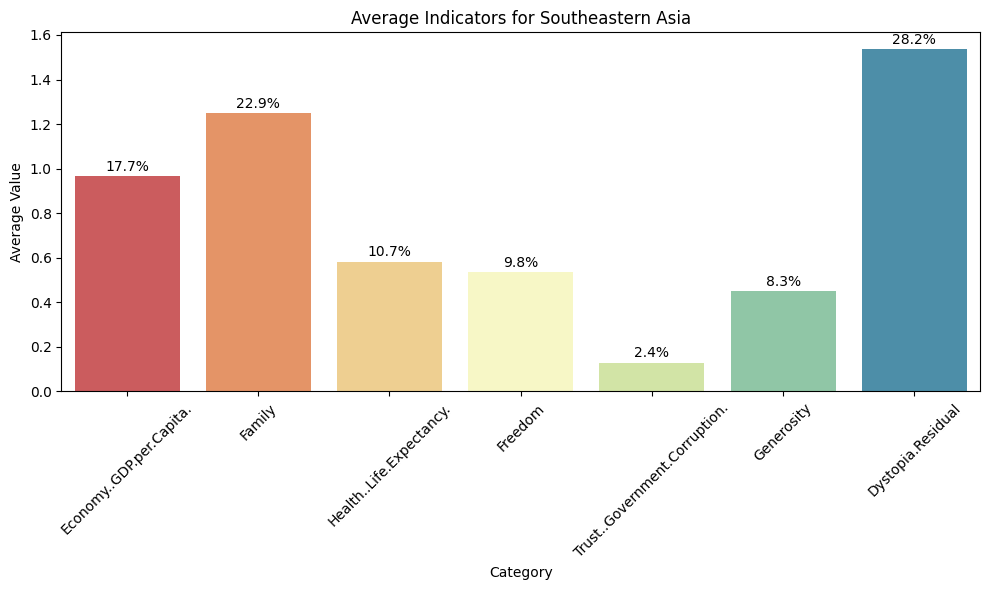

In [25]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'Southeastern Asia']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Southeastern Asia')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

12- Average Indicators for Eastern Asia

C:\Users\User\AppData\Local\Temp\ipykernel_32\3324426556.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


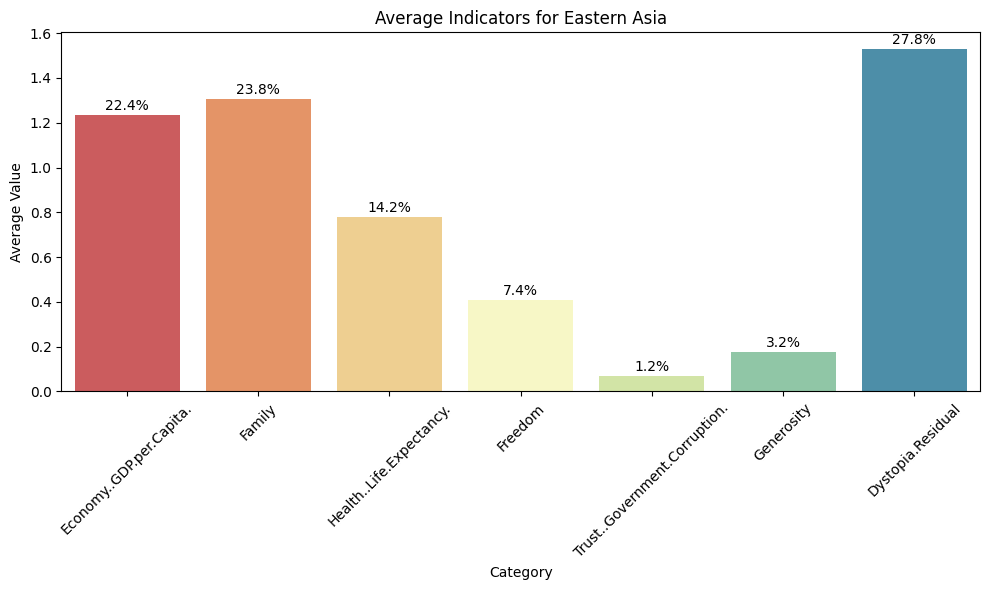

In [ ]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'Eastern Asia']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Eastern Asia')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

13- Average Indicators for Australia and New Zealand

C:\Users\User\AppData\Local\Temp\ipykernel_32\504951132.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


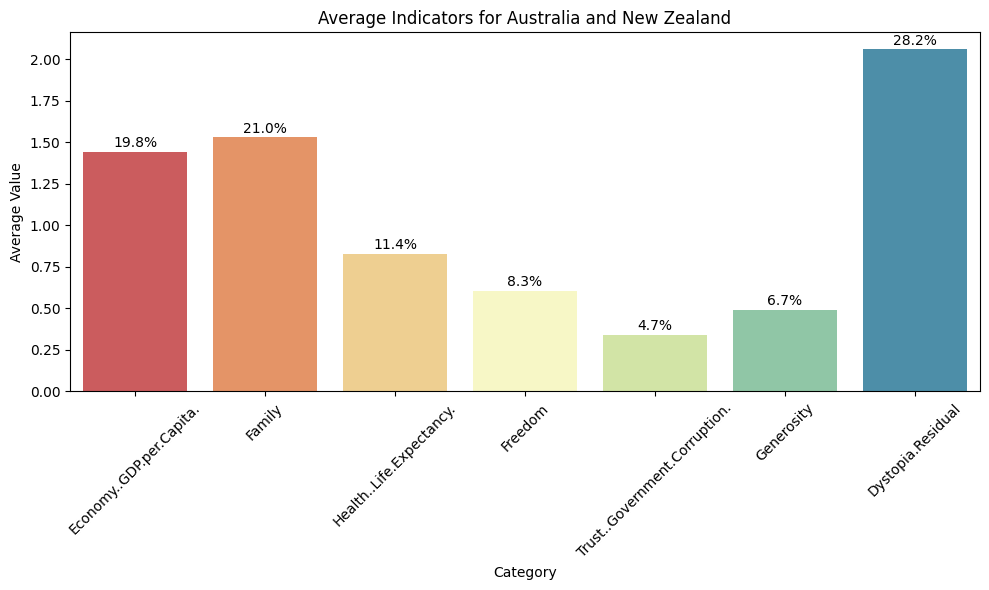

In [27]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'Australia and New Zealand']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Australia and New Zealand')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

14- Average Indicators for North America

C:\Users\User\AppData\Local\Temp\ipykernel_32\3111111452.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


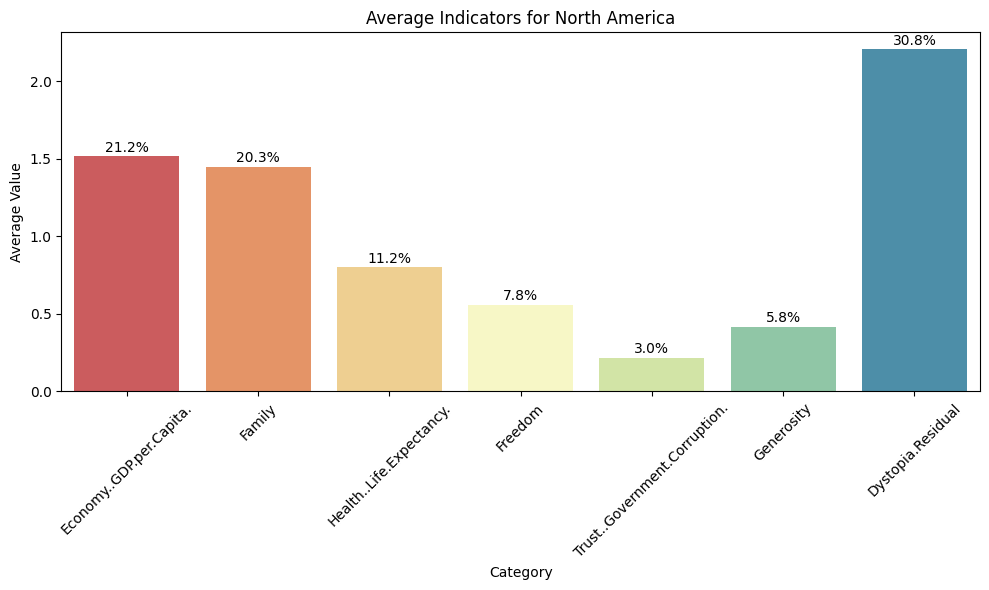

In [28]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'North America']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for North America')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

15- Average Indicators for Sub-Saharan Africa

C:\Users\User\AppData\Local\Temp\ipykernel_32\3644033194.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')


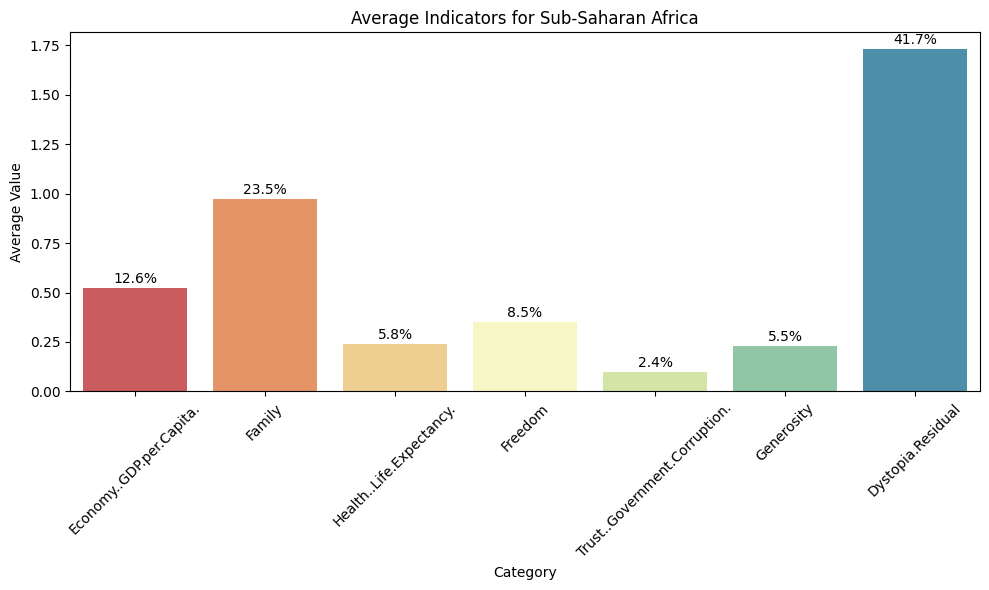

In [29]:
cols = ['Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual']
latin = h17[h17['Region'] == 'Sub-Saharan Africa']
averages = latin[cols].mean()
total = averages.sum()
percentages = (averages / total) * 100
df = pd.DataFrame({
    'Category': averages.index,
    'Average': averages.values,
    'Percentage': percentages.values
})
plt.figure(figsize=(10, 6))
bar = sns.barplot(data=df, x='Category', y='Average', palette='Spectral')
for index, row in df.iterrows():
    bar.text(index, row['Average'] + 0.01, f"{row['Percentage']:.1f}%", ha='center', va='bottom')
plt.title('Average Indicators for Sub-Saharan Africa')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

16- Top 10 Countries by Economy % of Happiness Score

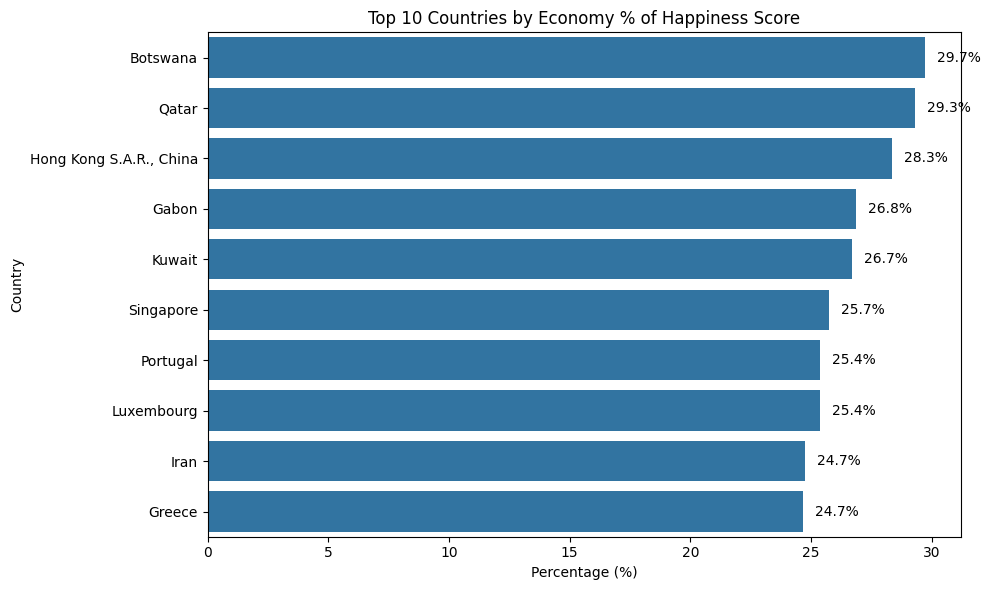

In [32]:
h17 = h17[h17['Happiness.Score'] > 2].copy()

h17['Economy_pct'] = (h17['Economy..GDP.per.Capita.'] / h17['Happiness.Score']) * 100
top10 = h17.sort_values(by='Economy_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Economy % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Economy_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

17- Top 10 Countries by Family % of Happiness Score

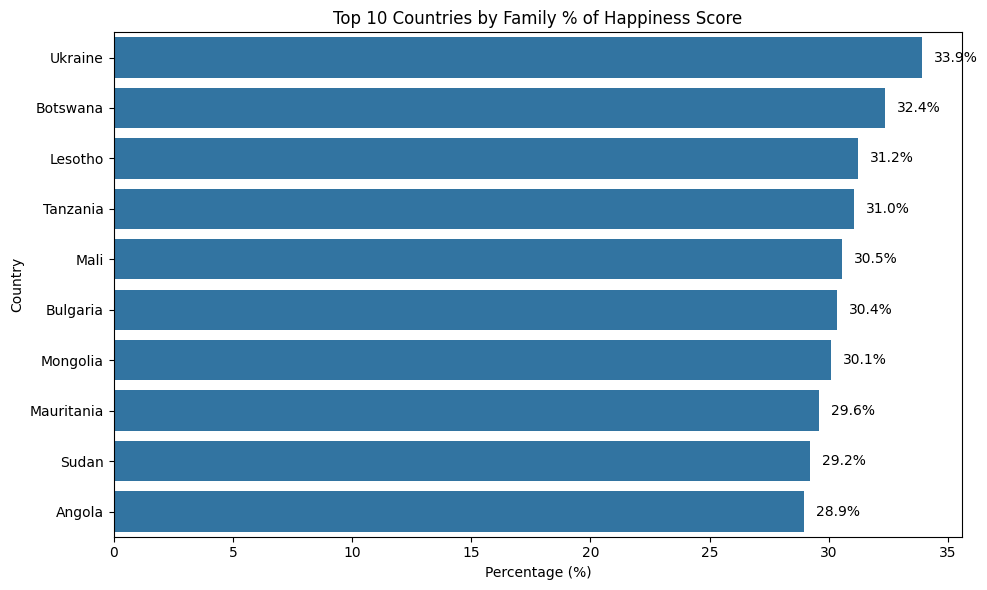

In [33]:
h17['Family_pct'] = (h17['Family'] / h17['Happiness.Score']) * 100
top10 = h17.sort_values(by='Family_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Family_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Family % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Family_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()


18- Top 10 Countries by Health % of Happiness Score

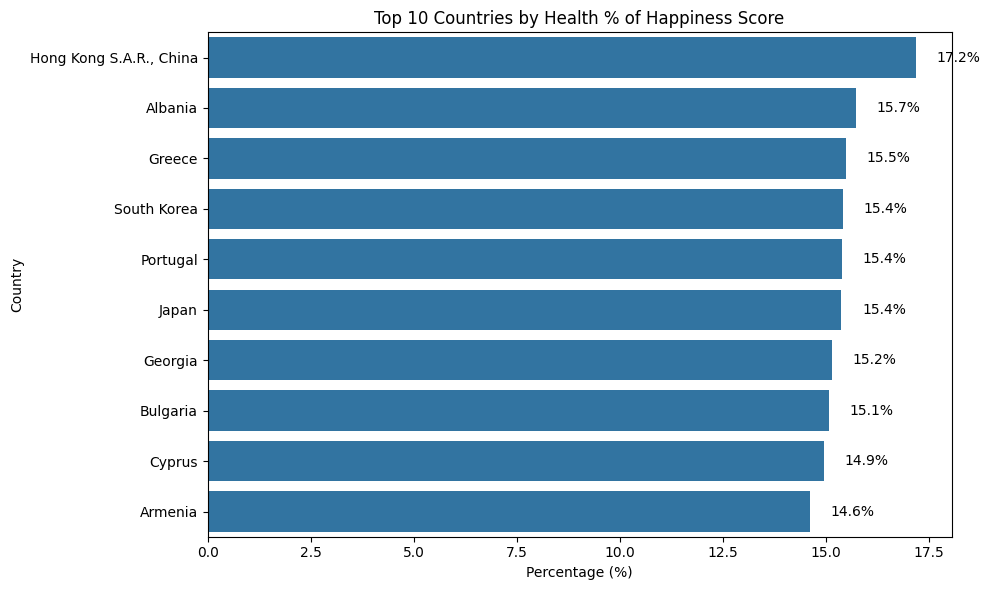

In [34]:
h17['Health_pct'] = (h17['Health..Life.Expectancy.'] / h17['Happiness.Score']) * 100
top10 = h17.sort_values(by='Health_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Health_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Health % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Health_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

19- Top 10 Countries by Freedom % of Happiness Score

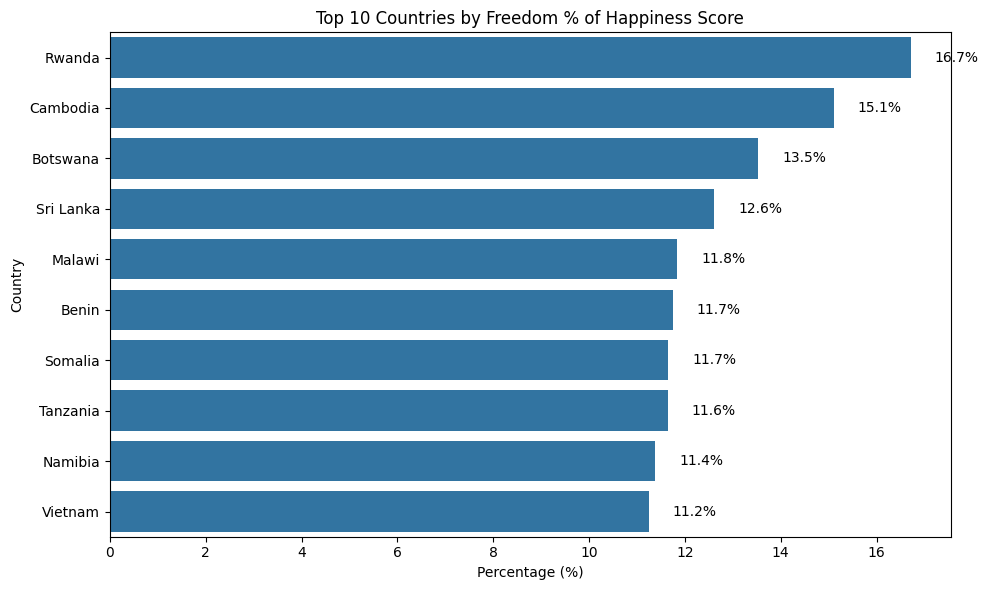

In [35]:
h17['Freedom_pct'] = (h17['Freedom'] / h17['Happiness.Score']) * 100
top10 = h17.sort_values(by='Freedom_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Freedom_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Freedom % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Freedom_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

20- Top 10 Countries by Trust % of Happiness Score

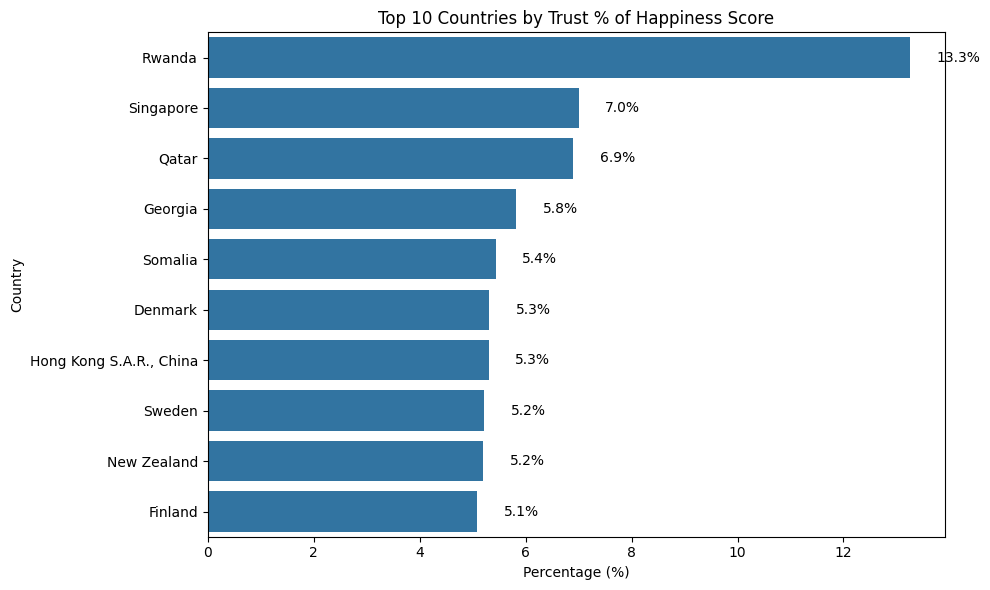

In [36]:
h17['Trust_pct'] = (h17['Trust..Government.Corruption.'] / h17['Happiness.Score']) * 100
top10 = h17.sort_values(by='Trust_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Trust_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Trust % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Trust_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

21- Top 10 Countries by Generosity % of Happiness Score

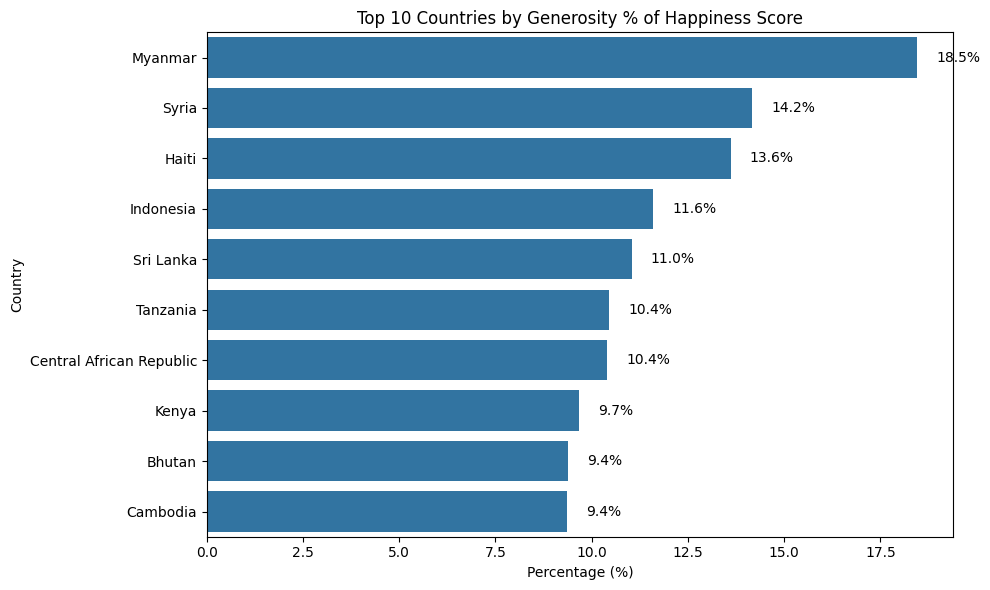

In [38]:
h17['Generosity_pct'] = (h17['Generosity'] / h17['Happiness.Score']) * 100
top10 = h17.sort_values(by='Generosity_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generosity_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Generosity % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Generosity_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

22-  Top 10 Countries by Dystopia Residual % of Happiness Score

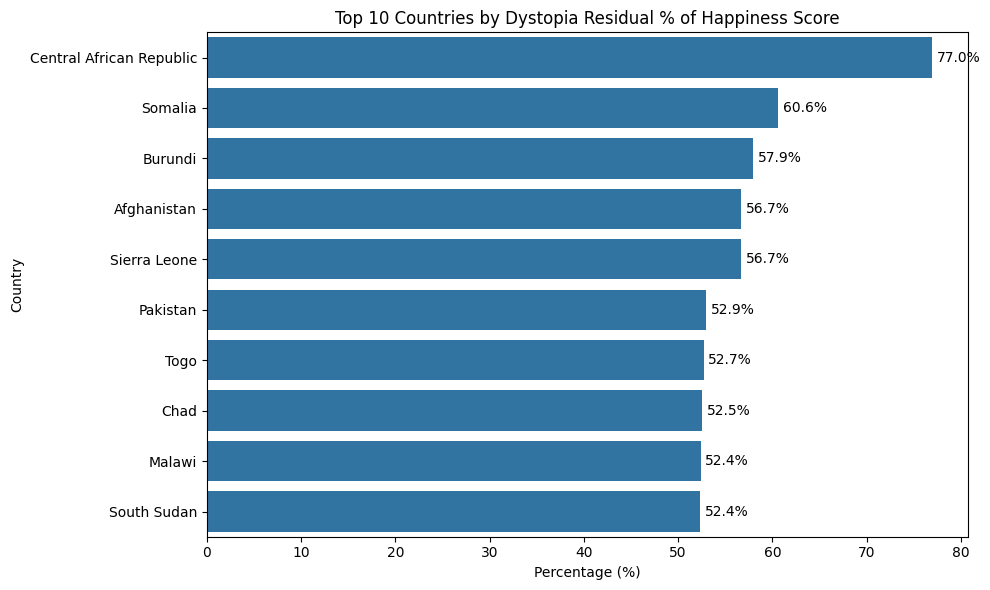

In [39]:
h17['Dystopia Residual_pct'] = (h17['Dystopia.Residual'] / h17['Happiness.Score']) * 100
top10 = h17.sort_values(by='Dystopia Residual_pct', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Dystopia Residual_pct', y='Country', data=top10)
plt.title('Top 10 Countries by Dystopia Residual % of Happiness Score')
plt.xlabel('Percentage (%)')
plt.ylabel('Country')
for i, v in enumerate(top10['Dystopia Residual_pct']):
    plt.text(v + 0.5, i, f"{v:.1f}%", va='center')
plt.tight_layout()
plt.show()

23- Top 10 Countries by Economy (GDP per Capita)

C:\Users\User\AppData\Local\Temp\ipykernel_32\355475194.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Economy..GDP.per.Capita.', y='Country', data=top_10, palette='crest')


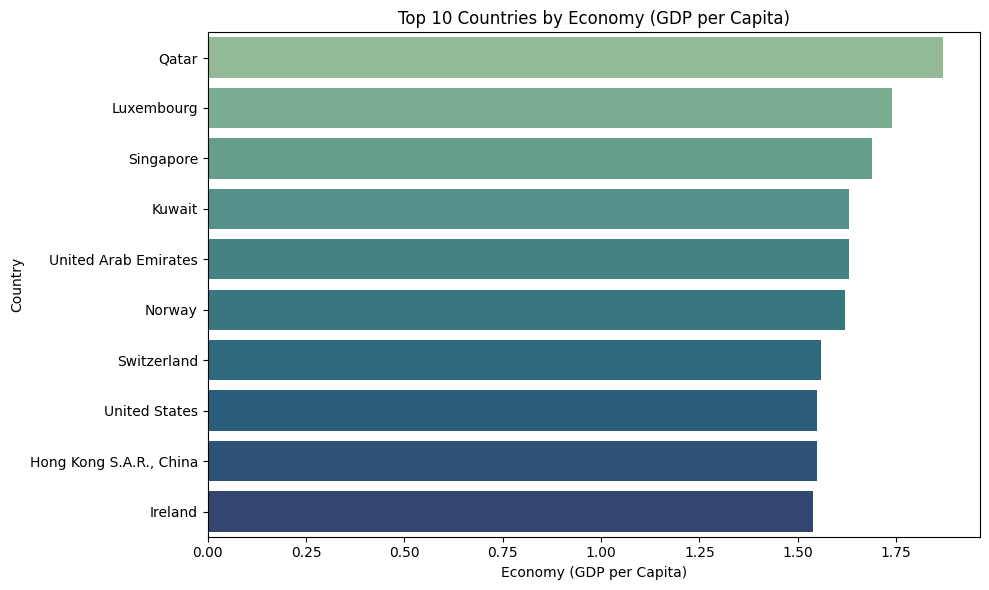

In [40]:
top_10 = h17[['Country', 'Economy..GDP.per.Capita.']].sort_values(by='Economy..GDP.per.Capita.', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Economy..GDP.per.Capita.', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Economy (GDP per Capita)')
plt.xlabel('Economy (GDP per Capita)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

24- Top 10 Countries by Family

C:\Users\User\AppData\Local\Temp\ipykernel_32\841657431.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Family', y='Country', data=top_10, palette='crest')


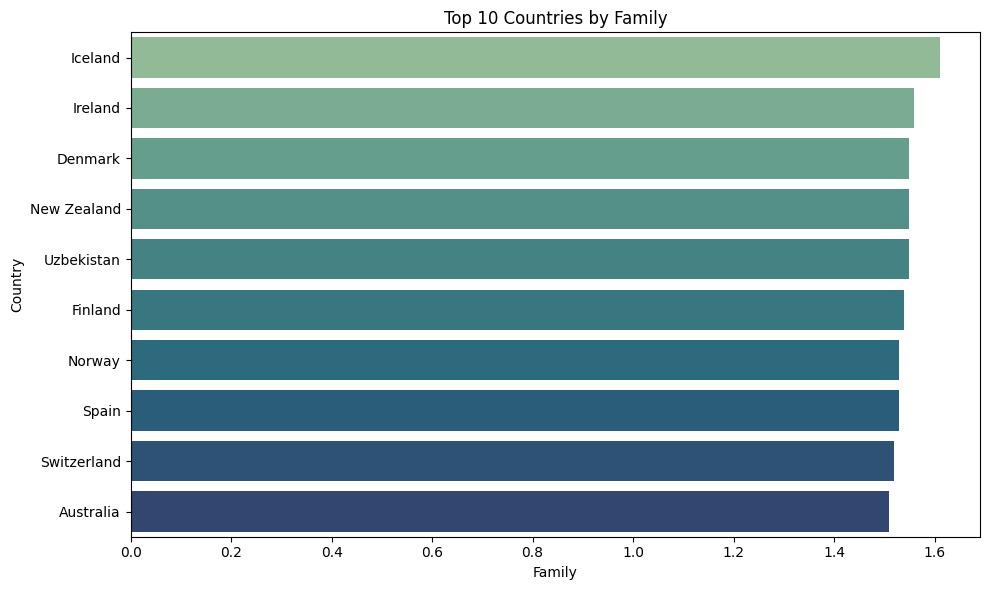

In [41]:
top_10 = h17[['Country', 'Family']].sort_values(by='Family', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Family')
plt.xlabel('Family')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


25- Top 10 Countries by Health (Life Expectancy)

C:\Users\User\AppData\Local\Temp\ipykernel_32\1626307418.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Health..Life.Expectancy.', y='Country', data=top_10, palette='crest')


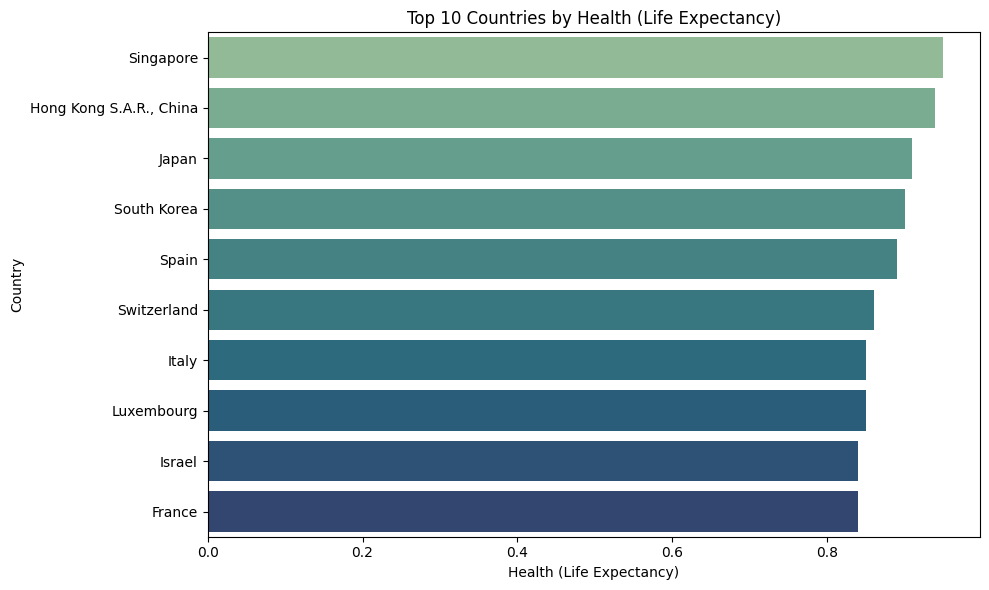

In [42]:
top_10 = h17[['Country', 'Health..Life.Expectancy.']].sort_values(by='Health..Life.Expectancy.', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Health..Life.Expectancy.', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Health (Life Expectancy)')
plt.xlabel('Health (Life Expectancy)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


26- Top 10 Countries by Freedom

C:\Users\User\AppData\Local\Temp\ipykernel_32\2565774938.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Freedom', y='Country', data=top_10, palette='crest')


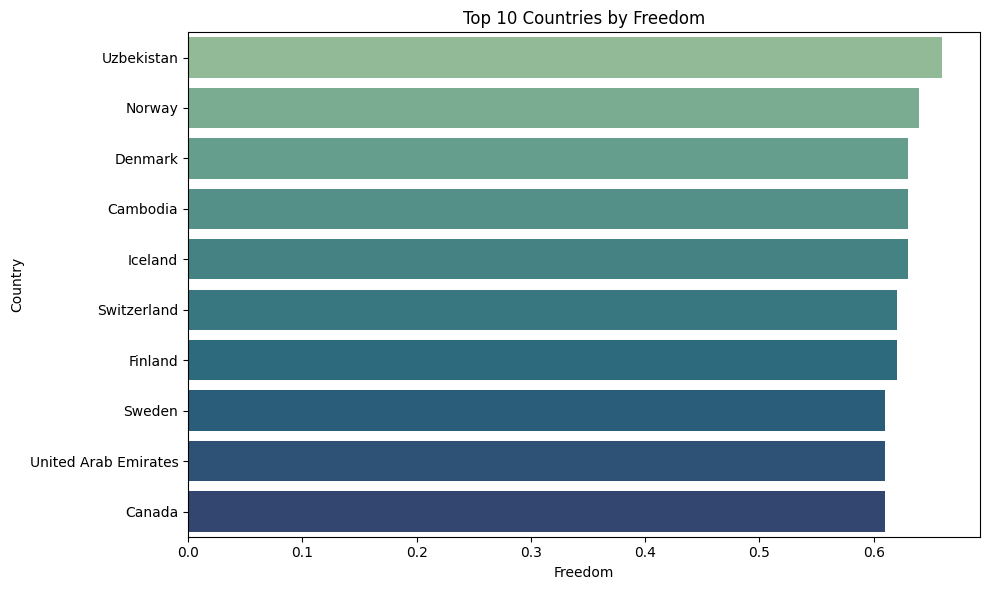

In [43]:
top_10 = h17[['Country', 'Freedom']].sort_values(by='Freedom', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Freedom', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Freedom')
plt.xlabel('Freedom')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


27- Top 10 Countries by Trust (Government Corruption)

C:\Users\User\AppData\Local\Temp\ipykernel_32\2331256983.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Trust..Government.Corruption.', y='Country', data=top_10, palette='crest')


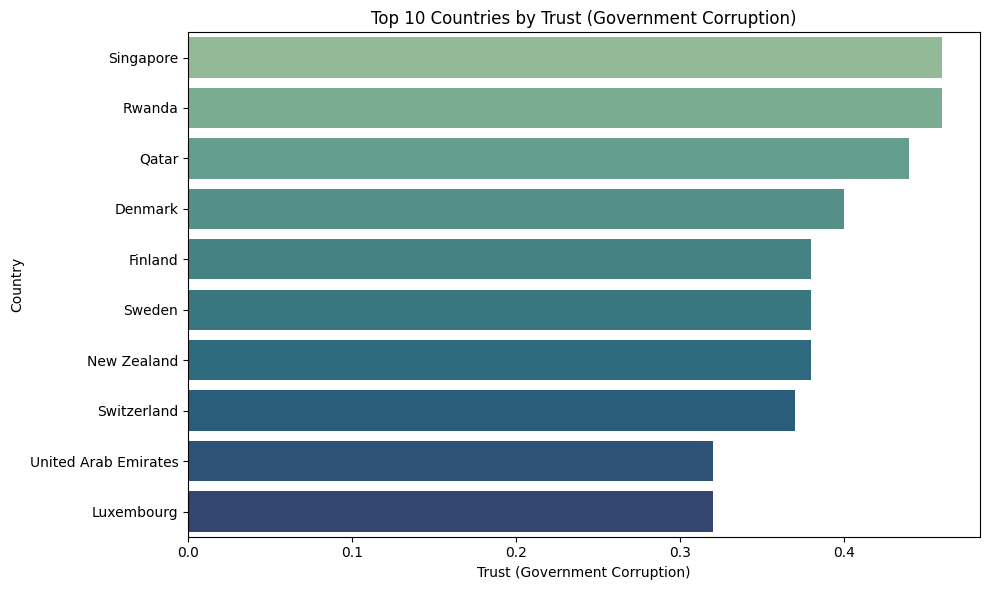

In [44]:
top_10 = h17[['Country', 'Trust..Government.Corruption.']].sort_values(by='Trust..Government.Corruption.', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Trust..Government.Corruption.', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Trust (Government Corruption)')
plt.xlabel('Trust (Government Corruption)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()

28- Top 10 Countries by Generosity

C:\Users\User\AppData\Local\Temp\ipykernel_32\1833316009.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Generosity', y='Country', data=top_10, palette='crest')


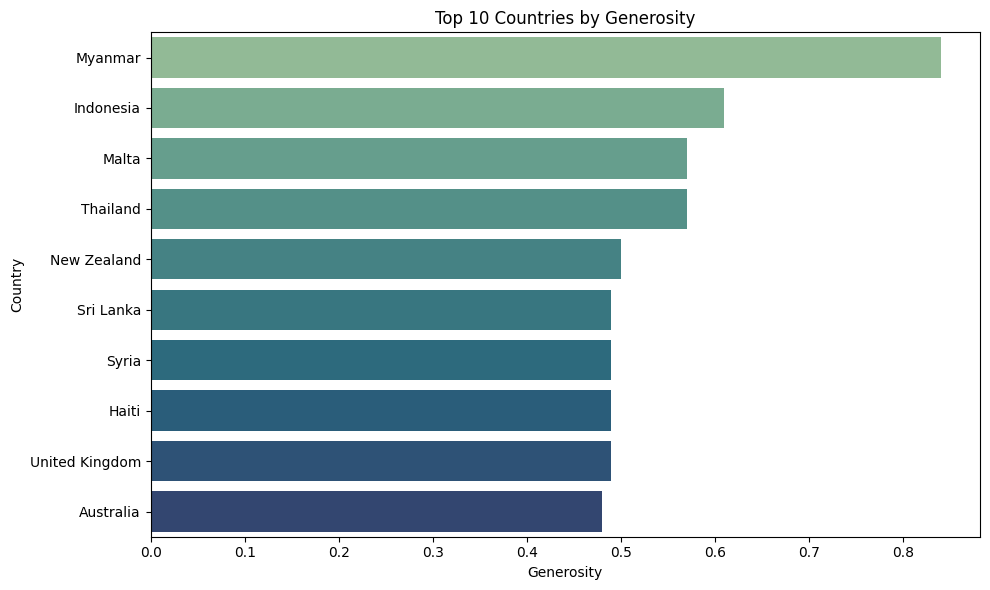

In [45]:
top_10 = h17[['Country', 'Generosity']].sort_values(by='Generosity', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Generosity', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Generosity')
plt.xlabel('Generosity')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


29- Top 10 Countries by Dystopia Residual

C:\Users\User\AppData\Local\Temp\ipykernel_32\1904570183.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Dystopia.Residual', y='Country', data=top_10, palette='crest')


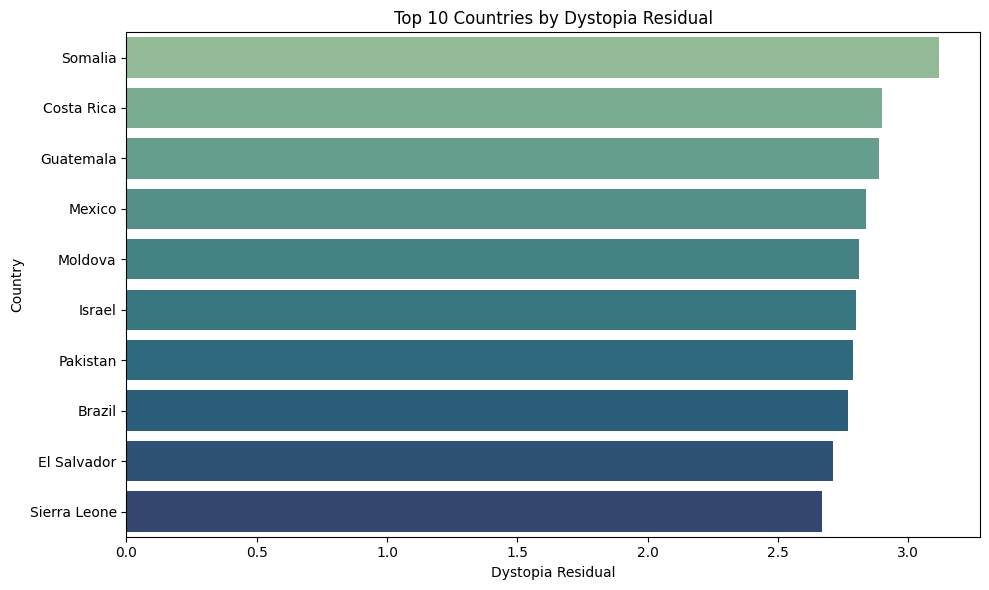

In [46]:
top_10 = h17[['Country', 'Dystopia.Residual']].sort_values(by='Dystopia.Residual', ascending=False).head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x='Dystopia.Residual', y='Country', data=top_10, palette='crest')
plt.title('Top 10 Countries by Dystopia Residual')
plt.xlabel('Dystopia Residual')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


30- Top Region per Feature (Absolute Values)

C:\Users\User\AppData\Local\Temp\ipykernel_32\920501010.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_abs, x='Value', y='Feature', palette='Set2')


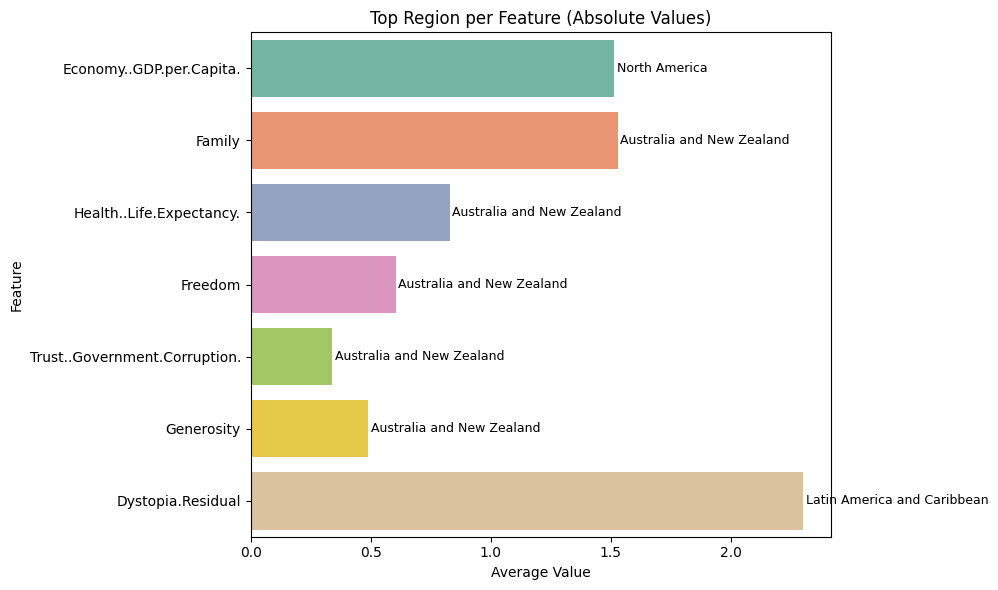

In [49]:
features = [
    'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual'
]
data = h17[['Region'] + features].dropna()
top_regions_abs = []
for feature in features:
    region_avg = data.groupby('Region')[feature].mean()
    top_region = region_avg.idxmax()
    top_value = region_avg.max()
    top_regions_abs.append({'Feature': feature, 'Value': top_value, 'Region': top_region})
df_abs = pd.DataFrame(top_regions_abs)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_abs, x='Value', y='Feature', palette='Set2')
for i, row in df_abs.iterrows():
    ax.text(row['Value'] + 0.01, i, row['Region'], va='center', fontsize=9, color='black')
plt.title('Top Region per Feature (Absolute Values)')
plt.xlabel('Average Value')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()


31- Top Region per Feature (as % of Happiness Score)

C:\Users\User\AppData\Local\Temp\ipykernel_32\802324146.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data=df_ratio, x='Value', y='Feature', palette='Set3')


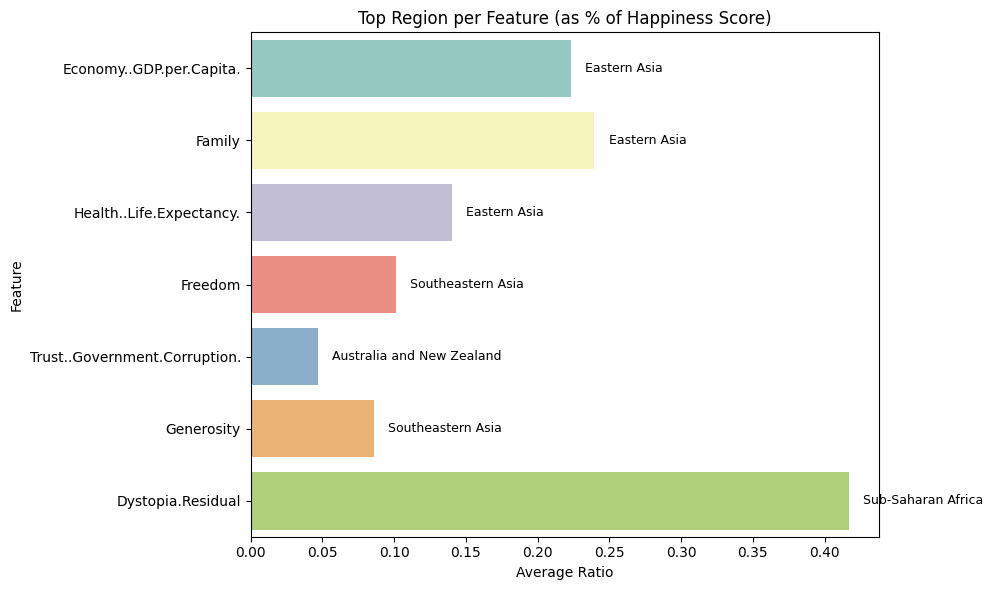

In [48]:
features = [
   'Economy..GDP.per.Capita.', 'Family', 'Health..Life.Expectancy.',
        'Freedom', 'Trust..Government.Corruption.', 'Generosity', 'Dystopia.Residual'
]
data = h17[['Region', 'Happiness.Score'] + features].dropna()
top_regions_ratio = []
for feature in features:
    data['Ratio'] = data[feature] / data['Happiness.Score']
    region_avg_ratio = data.groupby('Region')['Ratio'].mean()
    top_region = region_avg_ratio.idxmax()
    top_value = region_avg_ratio.max()
    top_regions_ratio.append({'Feature': feature, 'Value': top_value, 'Region': top_region})
df_ratio = pd.DataFrame(top_regions_ratio)
plt.figure(figsize=(10, 6))
ax = sns.barplot(data=df_ratio, x='Value', y='Feature', palette='Set3')
for i, row in df_ratio.iterrows():
    ax.text(row['Value'] + 0.01, i, row['Region'], va='center', fontsize=9, color='black')
plt.title('Top Region per Feature (as % of Happiness Score)')
plt.xlabel('Average Ratio')
plt.ylabel('Feature')
plt.tight_layout()
plt.show()
